 
This project involves the analysis of data obtained from the online dating application OKCupid. Over the past few years, there has been a significant increase in the use of dating apps for finding love. These apps employ advanced data science techniques to suggest potential matches to users and enhance their overall experience. Consequently, we now have access to an abundance of information that was previously unavailable, shedding light on diverse experiences of romance among individuals.

The objective of this project is to define, prepare, analyze, and develop a machine learning model to address a specific question. The data used for this analysis includes the profiles.csv file, which was provided by Codecademy.com.

1. Project Goals 

The primary objective of this project is to apply the machine learning techniques learned through Codecademy to a given dataset. Specifically, the research question to be addressed is whether it is possible to predict an OkCupid user's astrological sign using other variables from their profiles. This project holds significance because many users consider astrological signs as crucial factors in finding compatible matches. If users fail to provide their signs, OkCupid aims to predict their signs accurately.

2. Data 

The project utilizes a single dataset provided by Codecademy, named profiles.csv. Each row in the data represents an OkCupid user, and the columns contain their responses to various profile questions, including both multiple-choice and short-answer formats.

3. Analysis 

This solution will employ descriptive statistics and data visualization techniques to identify key insights regarding variable distribution, counts, and relationships. Given that the project's goal is to predict users' astrological signs, supervised learning classification algorithms will be implemented from the field of machine learning.

4. Evaluation 

The project will conclude with an evaluation of the selected machine learning model using a validation dataset. The predictions generated by the model can be assessed using a confusion matrix, as well as metrics such as accuracy, precision, recall, F1 score, and Kappa score.

# Data Importation & Dependences

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set matplotlib to display plots inline
%matplotlib inline

# Set default figure size for plots
plt.rcParams['figure.figsize'] = [6, 6]

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Specify the file path
file_path = 'profiles.csv'

# Load the profile data from the CSV file
profile_data = pd.read_csv(file_path, encoding='utf-8')

# Display the first few rows of the profile data
profile_data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Data Exploration

In [3]:
 print(profile_data.dtypes)

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object


The profiles dataset consists of 59,946 rows and 31 columns, which is promising as it indicates a substantial amount of data available for machine learning purposes.


The dataset includes a combination of continuous and categorical variables. Let's distinguish between them:

Continuous variables:
- age: Represents the continuous variable of the user's age.
- height: Represents the continuous variable indicating the height of the user.
- income: Represents the continuous variable denoting the income of the user.
- last_online: Represents a date variable indicating the user's last login.

Categorical variables:
- body_type: Represents the categorical variable specifying the body type of the user.
- diet: Represents the categorical variable providing information about the user's dietary preferences.
- drinks: Represents the categorical variable indicating the user's alcohol consumption habits.
- drugs: Represents the categorical variable indicating the user's drug usage habits.
- education: Represents the categorical variable indicating the user's educational attainment.
- ethnicity: Represents the categorical variable specifying the user's ethnic background.
- job: Represents the categorical variable describing the user's employment.
- offspring: Represents the categorical variable indicating the user's parental status.
- orientation: Represents the categorical variable denoting the user's sexual orientation.
- pets: Represents the categorical variable indicating the user's preferences regarding pets.
- religion: Represents the categorical variable indicating the user's religious background.
- sex: Represents the categorical variable indicating the user's gender.
- sign: Represents the categorical variable indicating the user's astrological symbol.
- smokes: Represents the categorical variable indicating the user's smoking habits.
- speaks: Represents the categorical variable specifying the languages spoken by the user.
- status: Represents the categorical variable indicating the user's relationship status.
- location: Represents the categorical variable indicating the user's location.

By distinguishing the variables, we can better understand their nature and appropriately handle them during analysis.


Additionally, the dataset includes a set of open short-answer responses:

- essay0: "My self summary"
- essay1: "What I’m doing with my life"
- essay2: "I’m really good at"
- essay3: "The first thing people usually notice about me"
- essay4: "Favorite books, movies, show, music, and food"
- essay5: "The six things I could never do without"
- essay6: "I spend a lot of time thinking about"
- essay7: "On a typical Friday night I am"
- essay8: "The most private thing I am willing to admit"
- essay9: "You should message me if…"

The first aspect to be examined is the number of unique signs and their values, as this is our main interest.

In [4]:
# Count the number of categories
num_categories = profile_data['sign'].nunique()

# Display the number of categories
print(f"Number of categories: {num_categories}")

# Display the unique categories
print("Categories:", profile_data['sign'].unique())

Number of categories: 48
Categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

Initially, it appears that there are 48 different signs, which is unexpected considering there should only be 12 zodiac signs. However, upon further investigation, it becomes apparent that there are qualifiers attached to the signs.

Cleaning the labels is crucial, as predicting 48 different sign variations would be challenging. To address this, we can extract the first word from each column, thereby saving the signs without the attached qualifiers. This approach allows us to focus on the primary zodiac signs, while potentially utilizing the qualifiers for another problem in the future.

In [5]:
def analyze_signs(profile_data):
    # Create a new column with cleaned sign values
    profile_data['signsCleaned'] = profile_data['sign'].str.split().str.get(0)

    # Calculate the number of categories
    num_categories = profile_data['signsCleaned'].nunique()

    # Print the number of categories
    print(f"Number of categories: {num_categories}")

    # Print the unique categories
    print("Categories:", profile_data['signsCleaned'].unique())

    # Print the value counts of each category
    print(profile_data['signsCleaned'].value_counts())

# Call the function with the profile_data dataset
analyze_signs(profile_data)


Number of categories: 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,signsCleaned
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,gemini
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,cancer
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,pisces
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,pisces
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,aquarius


In [46]:

# Replace "doesn&rsquo;t" with "does not" in the "offspring" column
profile_data['offspring'] = profile_data['offspring'].str.replace("doesn&rsquo;t", "does not")


The following plot illustrates the distribution of age within the group. 

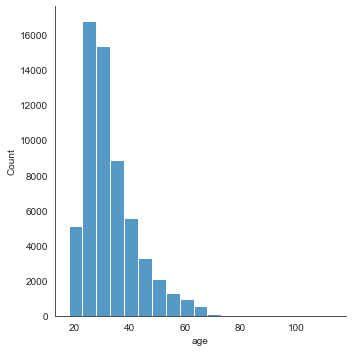

In [9]:
# Set the plot style
sns.set_style("white")

# Plot the age distribution
sns.displot(data=profile_data, x="age", kind="hist", binwidth=5)

# Display the plot
plt.show()


It is apparent that the majority of users fall within the age range of late 20s to early 30s.

Below is the same chart, but this time broken down by gender. 

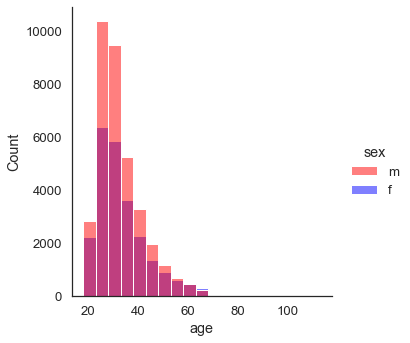

In [17]:

# Set a custom color palette
custom_palette = ["#FF0000", "#0000FF"] 

# Set the plot style
sns.set_style("white")

# Plot the age distribution broken down by gender with the custom color palette
sns.displot(data=profile_data, x="age", hue="sex", kind="hist", binwidth=5, palette=custom_palette)

# Display the plot
plt.show()


It appears that there is a proportionally similar distribution of gender across different age groups.

The following plot displays the distribution of the height variable. 

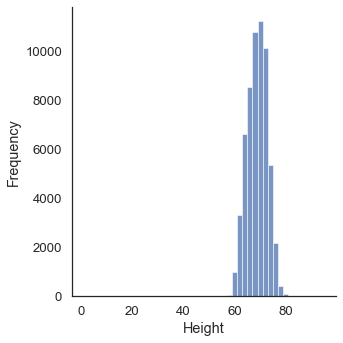

In [14]:

# Set the plot style and font scale
sns.set(style="white", font_scale=1.2)

# Plot the height distribution
sns.displot(data=profile_data, x="height", kind="hist", binwidth=2)

# Set the labels for x and y axes
plt.xlabel("Height")
plt.ylabel("Frequency")

# Display the plot
plt.show()


It appears that the majority of individuals have heights ranging from 5 feet to 6.5 feet.

Below is the same height chart, this time broken down by gender. 

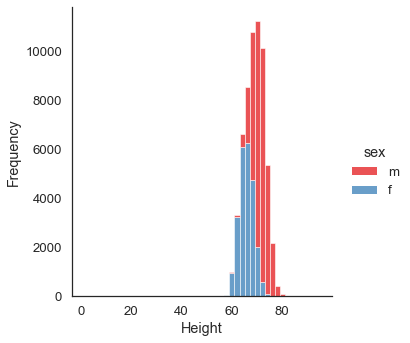

In [34]:

# Define a custom color palette
custom_palette = "Set1"  

# Set the plot style and font scale
sns.set(style="white", font_scale=1.2)

# Plot the height distribution broken down by sex with the custom color palette and stacked bars
sns.displot(data=profile_data, x="height", hue="sex", kind="hist", binwidth=2, multiple="stack", palette=custom_palette)

# Set the labels for x and y axes
plt.xlabel("Height")
plt.ylabel("Frequency")

# Display the plot
plt.show()


It is evident that females tend to have shorter heights compared to males, and the distribution appears to follow a normal distribution pattern.

 Here is the data for the income variable. 

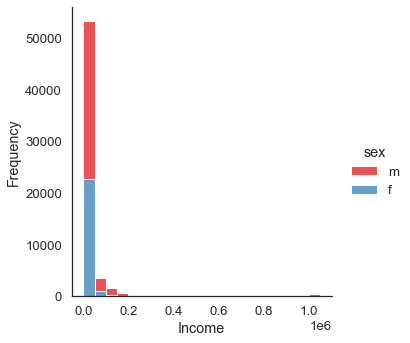

In [35]:

# Define a custom color palette 
custom_palette = "Set1"

# Set the plot style and font scale
sns.set(style="white", font_scale=1.2)

# Plot the income distribution broken down by sex with the custom color palette and stacked bars
sns.displot(data=profile_data, x="income", hue="sex", kind="hist", binwidth=50000, multiple="stack", palette=custom_palette)

# Set the labels for x and y axes
plt.xlabel("Income")
plt.ylabel("Frequency")

# Display the plot
plt.show()


It appears that the majority of participants have not provided their income figures.

Previously, it was observed that there is a larger representation of males in the dataset, with approximately 35,000 men compared to approximately 25,000 women.

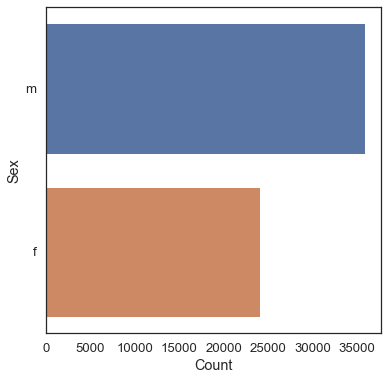

In [19]:
# Set the plot style and font scale
sns.set(style="white", font_scale=1.2)

# Plot the count of each category in the "sex" column
sns.countplot(data=profile_data, y="sex")

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Sex")

# Display the plot
plt.show()


The following chart presents the distribution of the body type variable. 

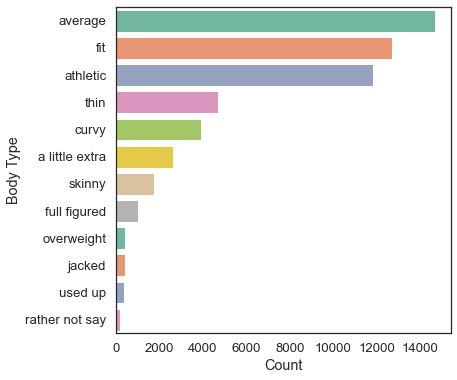

In [25]:

# Set a nice color palette
color_palette = "Set2" 

# Get the count of each category in the "body_type" column
body_type_counts = profile_data['body_type'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = body_type_counts.index.tolist()

# Set the plot style and font scale
sns.set(style="white", font_scale=1.2)

# Plot the count of each category in the "body_type" column with the specified color palette and sorted categories
sns.countplot(data=profile_data, y="body_type", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Body Type")

# Display the plot
plt.show()



It indicates that the majority of users describe themselves as average, fit, or athletic.

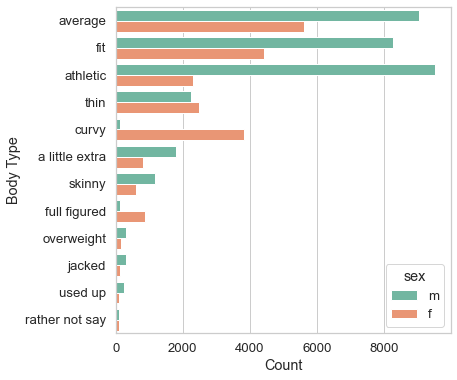

In [28]:

# Set a nice color palette
color_palette = "Set2"  

# Get the count of each category in the "body_type" column
body_type_counts = profile_data['body_type'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = body_type_counts.index.tolist()

# Set the plot style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Plot the count of each category in the "body_type" column broken down by sex,
# with the specified color palette, sorted categories, and legend
sns.countplot(data=profile_data, y="body_type", hue="sex", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Body Type")

# Display the plot
plt.show()


The chart below showcases the dietary information for users. 

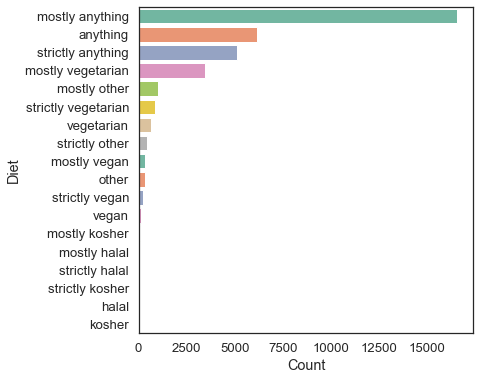

In [37]:

# Set a nice color palette
color_palette = "Set2"  

# Get the count of each category in the "diet" column
diet_counts = profile_data['diet'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = diet_counts.index.tolist()

# Set the plot style and font scale
sns.set(style="white", font_scale=1.2)

# Plot the count of each category in the "diet" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="diet", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Diet")

# Display the plot
plt.show()


It reveals that the majority of users follow a diet of "mostly anything," followed by "anything" and "strictly anything." This indicates that being open-minded when it comes to dietary preferences appears to be a popular characteristic among potential partners.

The next plot illustrates the drinking habits of users. 

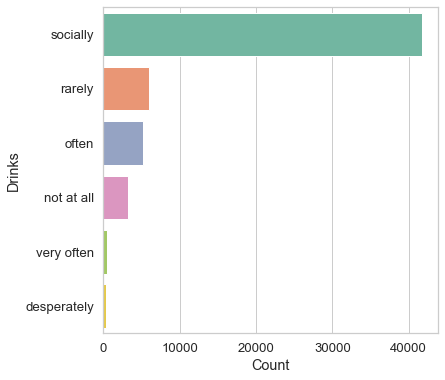

In [39]:

# Set a nice color palette
color_palette = "Set2" 

# Get the count of each category in the "drinks" column
drinks_counts = profile_data['drinks'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = drinks_counts.index.tolist()

# Set the plot style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Plot the count of each category in the "drinks" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="drinks", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Drinks")

# Display the plot
plt.show()


It reveals that the majority of users drink "socially," followed by "rarely" and "often."

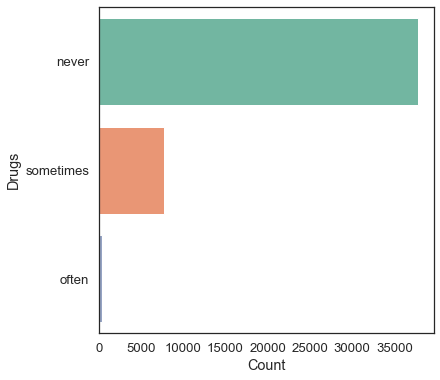

In [40]:

# Set a nice color palette
color_palette = "Set2"  

# Get the count of each category in the "drugs" column
drugs_counts = profile_data['drugs'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = drugs_counts.index.tolist()

# Set the plot style and font scale
sns.set(style="white", font_scale=1.2)

# Plot the count of each category in the "drugs" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="drugs", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Drugs")

# Display the plot
plt.show()


The data indicates that the vast majority of users state that they "never" use drugs.

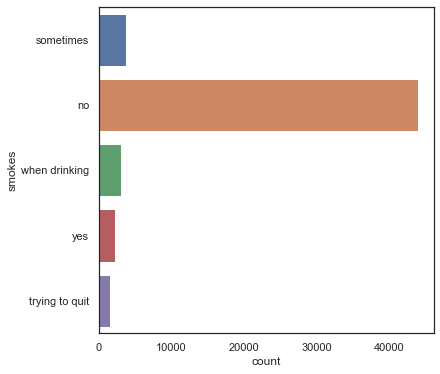

In [58]:
# Create a countplot to visualize the distribution of smoking habits
sns.countplot(data=profile_data, y="smokes");

Similarly, when it comes to drug usage, the majority of users selected "no" as their choice.

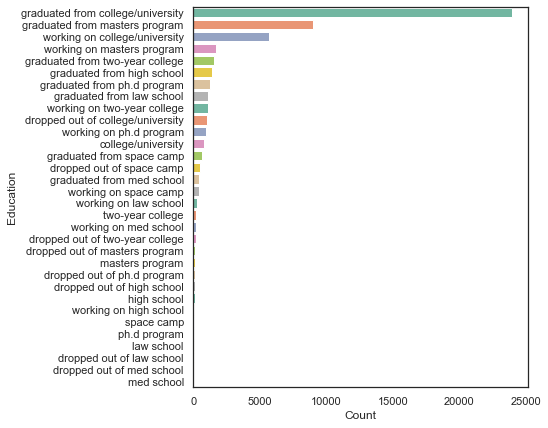

In [41]:

# Set the figure size
plt.figure(figsize=(6, 7))

# Set a nice color palette
color_palette = "Set2" 

# Get the count of each category in the "education" column
education_counts = profile_data['education'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = education_counts.index.tolist()

# Set the plot style
sns.set(style="white")

# Plot the count of each category in the "education" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="education", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Education")

# Display the plot
plt.show()


The data reveals that the majority of users have completed their education at the college/university level, followed by those with master's degrees. Additionally, it is interesting to note that options related to space camp have gained some popularity among the respondents.

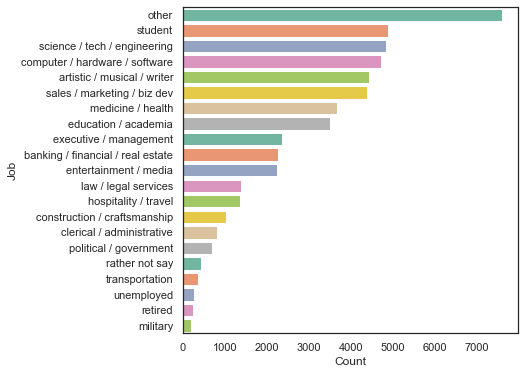

In [43]:

# Set a nice color palette
color_palette = "Set2"  

# Get the count of each category in the "job" column
job_counts = profile_data['job'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = job_counts.index.tolist()

# Set the plot style
sns.set(style="white")

# Plot the count of each category in the "job" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="job", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Job")

# Display the plot
plt.show()


The data shows that a significant portion of users do not fit into the provided job categories. However, there is a notable representation of students, artists, individuals in the tech industry, and business professionals among the respondents.

The relationship status on a dating website is quite predictable. It is reasonable to assume that the majority of users are single and available, and this is indeed reflected in the data.

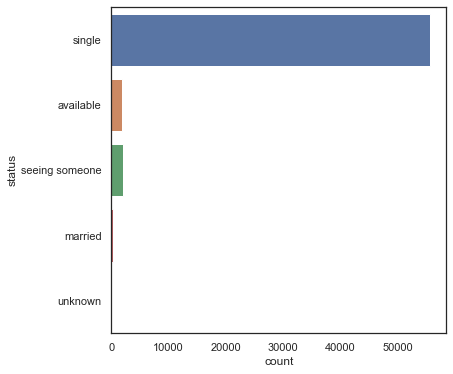

In [61]:
# Create a countplot to visualize the distribution of relationship statuses
sns.countplot(data=profile_data, y="status");


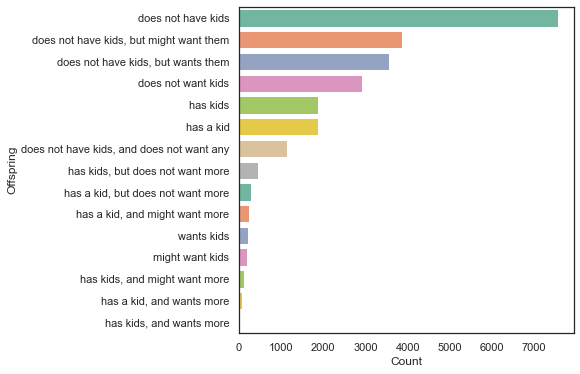

In [47]:

# Set a nice color palette
color_palette = "Set2"  

# Get the count of each category in the "offspring" column
offspring_counts = profile_data['offspring'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = offspring_counts.index.tolist()

# Set the plot style
sns.set(style="white")

# Plot the count of each category in the "offspring" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="offspring", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Offspring")

# Display the plot
plt.show()


According to the data, it appears that the majority of users do not have children.

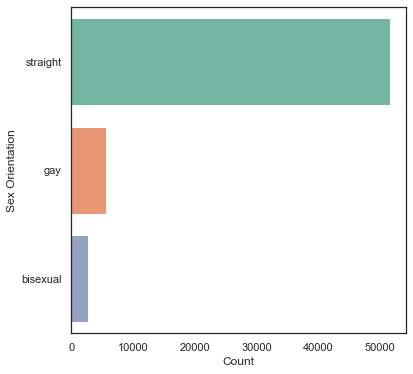

In [60]:

# Set a nice color palette
color_palette = "Set2"  

# Get the count of each category in the "orientation" column
orientation_counts = profile_data['orientation'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = orientation_counts.index.tolist()

# Set the plot style
sns.set(style="white")

# Plot the count of each category in the "orientation" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="orientation", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Sex Orientation")

# Display the plot
plt.show()


The data indicates that the majority of users identify as straight.

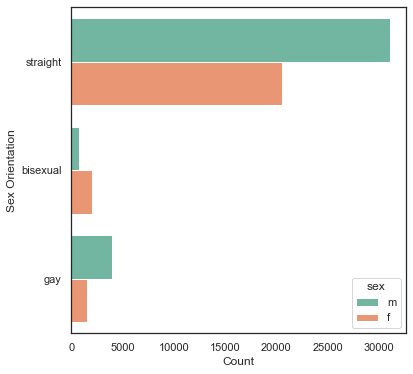

In [52]:

# Set a nice color palette
color_palette = "Set2"  

# Set the plot style
sns.set(style="white")

# Plot the count of each category in the "orientation" column,
# with the counts broken down by gender (hue)
sns.countplot(data=profile_data, y="orientation", hue="sex", palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Sex Orientation")

# Display the plot
plt.show()


Interestingly, the data reveals that the majority of users who identify as bisexual are female.

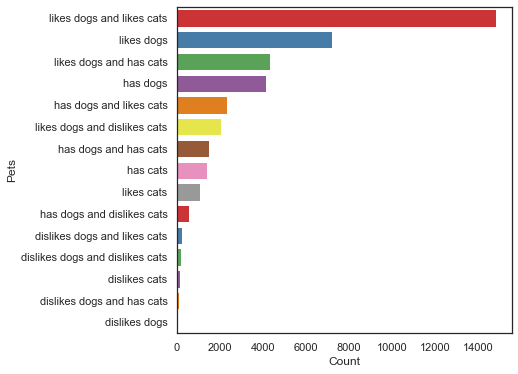

In [51]:


# Set a nice color palette
color_palette = "Set1"  

# Get the count of each category in the "pets" column
pets_counts = profile_data['pets'].value_counts()

# Get the categories sorted by decreasing count
sorted_categories = pets_counts.index.tolist()

# Set the plot style
sns.set(style="white")

# Plot the count of each category in the "pets" column,
# with the specified color palette, sorted categories, and orientation
sns.countplot(data=profile_data, y="pets", order=sorted_categories, palette=color_palette)

# Set the labels for x and y axes
plt.xlabel("Count")
plt.ylabel("Pets")

# Display the plot
plt.show()


The chart indicates that the majority of users have a preference for or own dogs.

Religion, much like astrological signs, exhibits a considerable number of qualifiers.

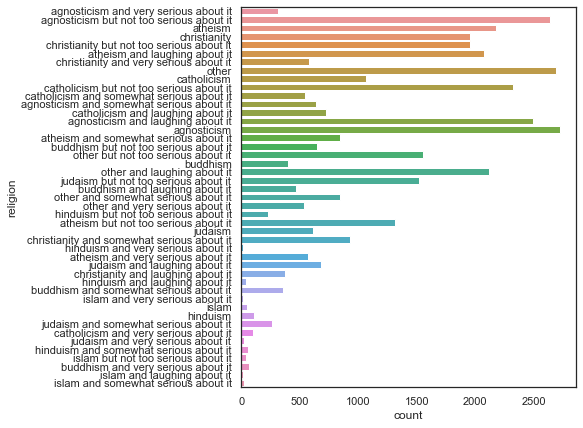

In [53]:
#Set the figure size
plt.figure(figsize=(6, 7))

# Create a countplot for the "religion" variable
sns.countplot(data=profile_data, y="religion");

Let's clean the "religion" column by extracting only the first word and consolidating it into fewer groups.

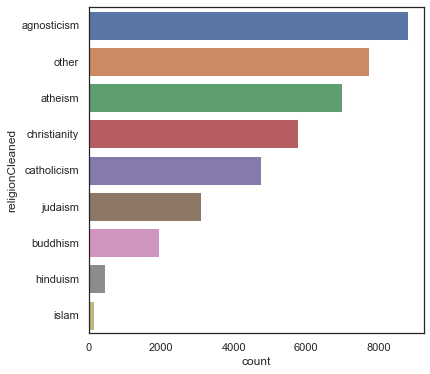

In [55]:
# Clean the "religion" column by extracting only the first word and create a new column "religionCleaned"
profile_data['religionCleaned'] = profile_data['religion'].str.split().str.get(0)

# Get the value counts for each category in "religionCleaned"
religion_counts = profile_data['religionCleaned'].value_counts()

# Create a countplot for the "religionCleaned" variable and order it by count
sns.countplot(data=profile_data, y="religionCleaned", order=religion_counts.index);



The majority of respondents did not identify with strong religious affiliations, but rather as agnostic, other, or atheists.

Now, let's shift our focus to the astrological signs of the users, which is our primary concern in this project.

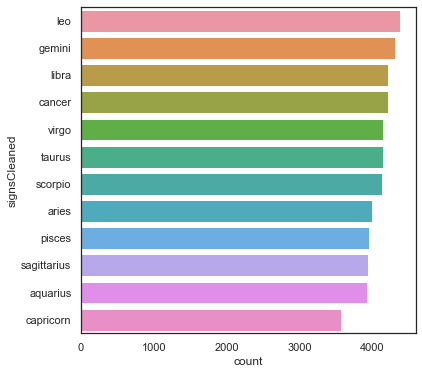

In [57]:
# Get the value counts for each category in "signsCleaned"
sign_counts = profile_data['signsCleaned'].value_counts()

# Create a countplot for the "signsCleaned" variable and order it by count
sns.countplot(data=profile_data, y="signsCleaned", order=sign_counts.index);


The distribution of astrological signs appears to be relatively even, with Capricorns being the least common and Leos being the most prevalent among the users.

# Data Preparation


#### Missing Data

Missing data can often pose challenges for machine learning algorithms, as they might not handle it effectively. Therefore, it is crucial to check for missing data and decide whether to impute or remove them. It appears that many columns in the dataset do contain missing values.

In [62]:
profile_data.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

### Preprocessing

Data preparation is a crucial step in modeling as it can enhance the process and lead to better models. As the saying goes, "garbage in, garbage out," we must ensure that the data we input into our modeling step is of high quality and suitable for sharing with others.



The data used for the model will be a subset of the variables. These specific variables were selected because they are likely to be good predictors of astrological signs, whereas certain variables, such as age, were not included as they may not be strong indicators.

In this process, any missing values (na values) are dropped to create a fully complete dataset.

In [63]:
# Select the relevant columns for the model
selected_columns = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']

# Create a new dataframe by extracting the selected columns and dropping any rows with missing values
df = profile_data[selected_columns].dropna()

# Check the shape of the new dataframe
df.shape


(16453, 8)

#### Dummy Variables

In the subsequent step, we create dummy variables to handle the categorical variables. These dummy variables will transform each category within a variable into its own binary identifier. 

In [65]:
# Create dummy variables for each categorical column in the dataframe
for col in selected_columns[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix=[col])


In [66]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Label Imbalance

Checking for an imbalance in the prediction labels is crucial, especially in a multi-class problem with multiple potential outcomes. Imbalance in the response variable can lead to certain labels occurring infrequently, which becomes problematic for machine learning algorithms. It may result in inadequate data for training, leading to inaccurate predictions.


In [67]:
# Count the occurrences of each value in the "signsCleaned" column
sign_counts = df['signsCleaned'].value_counts()
sign_counts

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signsCleaned, dtype: int64

In the given dataset, we notice that the counts of all the zodiac signs are relatively balanced, with no significant deviations. Consequently, we do not need to be concerned about imbalances or attempt to address this issue since the data appears to be well-distributed across the different astrological signs.

#### Data Splitting

Next, we need to split the data into training and validation sets. For this split, 25% of the data is reserved for the final validation, while the remaining 75% is used to train the model.

In [68]:
# Determine the number of columns in the DataFrame
col_length = len(df.columns)

# Y is the target column, and X contains the rest of the data
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

# Set the validation chunk size
val_size = 0.25

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=0)

# Convert the target variables Y_train and Y_val to 1D arrays
Y_train = Y_train.values.ravel()
Y_val = Y_val.values.ravel()


### Prediction 

#### Model Building

Now, it is time to develop the models for this project. We have selected three common algorithms that are suitable for this prediction task.

1. Logistic Regression: We choose logistic regression as it is a simple yet effective algorithm for binary classification problems, and it can be extended to handle multi-class classification tasks like ours. Since we are predicting astrological signs, which are categorical in nature, logistic regression can be a good starting point.

2. Decision Trees: Decision trees are chosen because they are powerful for both classification and regression tasks. They are particularly useful for capturing non-linear relationships in the data and can handle both categorical and numerical features. As our dataset includes a mix of categorical and numerical variables, decision trees can be helpful in generating interpretable rules for astrological sign prediction.

3. K-Nearest Neighbors (KNN): KNN is a versatile algorithm for classification tasks, especially when there are no clear boundaries between classes. It makes predictions based on the similarity of data points to their neighbors, and it is effective when the underlying data has complex patterns. Since astrological signs may not have distinct decision boundaries, KNN can be useful for identifying similar users with similar signs based on their profiles.

In summary, we have chosen these three algorithms because they offer different strengths that complement each other and can provide valuable insights into predicting astrological signs.

In [69]:
# Importing the necessary modules for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


#### Logistic Regression Model

The first model employs logistic regression with the `multi_class="multinomial"` argument. Using the `lr_model`, predictions are generated from the training dataset to evaluate the model's performance.

In [70]:
# Create and train the Logistic Regression model with the multi_class="multinomial" argument
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)

# Make predictions using the trained Logistic Regression model on the training dataset
lr_predictions = lr_model.predict(X_train)


In [72]:
# Import the classification_report module from scikit-learn
from sklearn.metrics import classification_report

In [74]:
# Print the classification report for the Logistic Regression model's performance on the training dataset
print(classification_report(Y_train, lr_predictions))


              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



The logistic regression model achieved a final accuracy of 12%, which is exceptionally poor considering that random guessing would result in being correct approximately 8% of the time (1/12).

#### K Nearest Neighbor (KNN) Model

The next model is the KNeighborsClassifier, which considers 20 of its nearest neighbors to predict the astrological signs. The default value for n_neighbors is 5, and it was retained for this model. However, this number can be fine-tuned later if necessary. 

In [75]:
# Create and train the K Nearest Neighbor (KNN) model with n_neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)

# Make predictions using the trained KNN model on the training dataset
knn_predictions = knn_model.predict(X_train)


In [76]:
# Print the classification report for the K Nearest Neighbor (KNN) model's performance on the training dataset
print(classification_report(Y_train, knn_predictions))


              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



The KNN model achieved an accuracy of 33%, which is a positive indication of its performance.

#### Decision Tree Model

The final model in our analysis is the decision tree model, where the default `max_depth` is set to `None`. This means that the nodes of the tree will be expanded until all leaves are pure or until each leaf contains fewer samples than the specified `min_samples_split`.

In [78]:
# Create and train the Decision Tree model with default parameters
dt_model = DecisionTreeClassifier().fit(X_train, Y_train)

# Make predictions using the trained Decision Tree model on the training dataset
dt_predictions = dt_model.predict(X_train)


In [79]:
# Print the classification report for the Decision Tree model's performance on the training dataset
print(classification_report(Y_train, dt_predictions))


              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



The results from this decision tree model are highly promising, as it achieved an accuracy of 78%, demonstrating its ability to make accurate predictions.

Below is a confusion matrix that displays the true values on the y-axis and the predicted values on the x-axis. The diagonals in the matrix appear lighter in color and have higher numbers, indicating that these are the True Positives. Consequently, the accuracy of the model is expected to be high, as the True Positives contribute to the correct predictions.

In [80]:
# Import the confusion_matrix module from scikit-learn
from sklearn.metrics import confusion_matrix

# Create the confusion matrix for the Decision Tree model's predictions on the training dataset
dt_cm = confusion_matrix(Y_train, dt_predictions)

# Retrieve the class labels used by the Decision Tree model
dt_labels = dt_model.classes_


[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

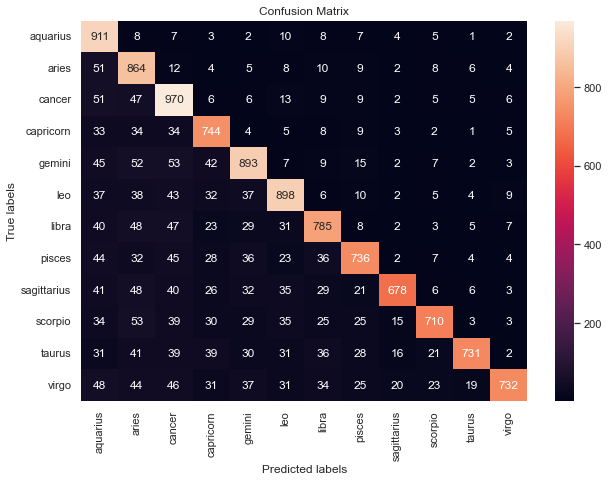

In [81]:
# Set the figure size for the plot
plt.figure(figsize=(10, 7))

# Create the heatmap for the Decision Tree model's confusion matrix
ax = plt.subplot()
sns.heatmap(dt_cm, annot=True, ax=ax, fmt="d")

# Set labels, title, and ticks for the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=0)
ax.xaxis.set_tick_params(rotation=90)

# Set the tick labels for x and y axes
ax.xaxis.set_ticklabels(dt_labels)
ax.yaxis.set_ticklabels(dt_labels)


In [83]:
# Retrieve the Depth of the Decision Tree model 
dt_model.get_depth()

49

A quick analysis revealed that this tree model has a depth of 49 branches, indicating that it might not generalize well to another dataset. In this instance, the model has been "overfit" to this specific data, meaning it has captured the noise and intricacies of the training data to an excessive degree. As a consequence, its ability to make accurate predictions on unseen data might be compromised. To address this overfitting issue, model regularization or tuning might be necessary.

To support this argument, a five-fold cross-validation is performed using the same data. The results indicate that the decision tree model's performance is worse than both the KNN and logistic regression algorithms. Moreover, when compared to the baseline, which achieved approximately 9% accuracy, the decision tree's performance is still not satisfactory. This outcome reinforces the observation that the decision tree model is likely overfitting to the training data and struggling to generalize to new datasets effectively. The results from the cross-validation process serve as evidence for the model's limitations and the need for further refinement or alternative modeling approaches.

In [84]:
# Import the necessary modules for cross-validation
from sklearn.model_selection import KFold, cross_val_score

# Set up KFold cross-validation with 5 splits, shuffle, and random state
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation and obtain the accuracy results
results = cross_val_score(dt_model, X_train, Y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation accuracy results
print(results)
print("Mean Accuracy: %.2f%% (Std: %.2f%%)" % (results.mean()*100, results.std()*100))


[0.08306321 0.09278768 0.09562399 0.10008104 0.08674503]
Mean Accuracy: 9.17% (Std: 0.61%)


The decision tree model will be retrained with a `max_depth` of 20 to prevent the algorithm from continuing further. The new accuracy rate of approximately 41% is lower than the accuracy of the first iteration but slightly better than the KNN model's accuracy. Despite the improvement, it is still not achieving satisfactory performance, indicating that further adjustments or different modeling techniques might be necessary to obtain better results.

In [85]:
# Create and train the Decision Tree model with max_depth = 20
dt_model20 = DecisionTreeClassifier(max_depth=20).fit(X_train, Y_train)

# Make predictions using the trained Decision Tree model with max_depth = 20 on the training dataset
dt_predictions20 = dt_model20.predict(X_train)

# Print the classification report for the Decision Tree model's performance with max_depth = 20 on the training dataset
print(classification_report(Y_train, dt_predictions20))


              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.43      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.61      0.35      0.44       997
 sagittarius       0.66      0.33      0.44       965
     scorpio       0.37      0.39      0.38      1001
      taurus       0.53      0.38      0.44      1045
       virgo       0.32      0.39      0.35      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



Upon reevaluation using cross-validation, the new Decision Tree model with `max_depth=20` continues to exhibit an average accuracy of approximately 8%. This performance is still not very satisfactory, indicating that the model's improvements are not significant enough to address the underlying issues. Further adjustments or alternative modeling approaches might be necessary to achieve better results.

In [86]:
# Perform cross-validation with the new Decision Tree model (max_depth=20) and obtain the accuracy results
results20 = cross_val_score(dt_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation accuracy results for the new Decision Tree model
print("Cross-Validation Accuracy Results for Decision Tree Model (max_depth=20):")
print(results20)
print("Mean Accuracy: %.2f%% (Std: %.2f%%)" % (results20.mean()*100, results20.std()*100))


Cross-Validation Accuracy Results for Decision Tree Model (max_depth=20):
[0.07698541 0.08549433 0.08508914 0.08265802 0.09160924]
Mean Accuracy: 8.44% (Std: 0.47%)


#### Final Model

Based on the analysis, it appears that the KNN model (knn_model) might be the most suitable choice for OkCupid to use when users don't have their astrological signs listed on their user profiles. The KNN model outperforms the other models on the validation set, achieving an accuracy of approximately 8%, which, admittedly, is not a very high accuracy rate. However, it still performs better than the other models on this specific task. To further improve the accuracy, additional data or alternative modeling approaches may need to be explored. Nonetheless, the KNN model demonstrates promise for predicting astrological signs in cases where users haven't provided this information in their profiles.

In [87]:
# Make predictions using the trained KNN model on the validation dataset
knn_predictionsVal = knn_model.predict(X_val)


# Print the classification report for the KNN model's performance on the validation dataset
print("Classification Report for KNN Model on Validation Dataset:")
print(classification_report(Y_val, knn_predictionsVal))


Classification Report for KNN Model on Validation Dataset:
              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

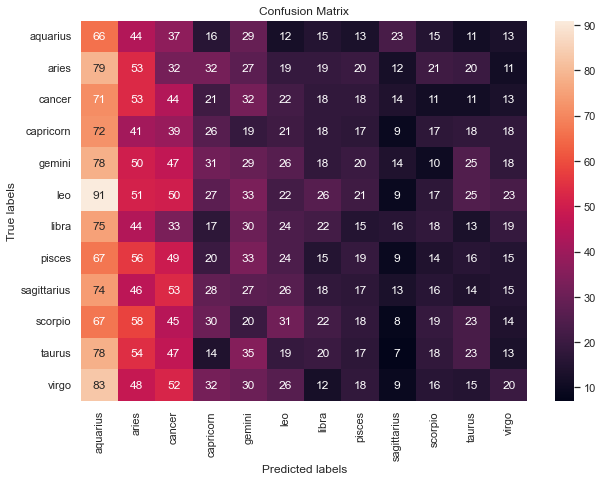

In [89]:
# Create the confusion matrix for the KNN model's predictions on the validation dataset
final_cm = confusion_matrix(Y_val, knn_predictionsVal)

# Retrieve the class labels used by the KNN model
knn_labels = knn_model.classes_

# Set the figure size for the plot
plt.figure(figsize=(10, 7))

# Create the heatmap for the confusion matrix
ax = plt.subplot()
sns.heatmap(final_cm, annot=True, ax=ax, fmt="d")

# Set labels, title, and ticks for the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=0)
ax.xaxis.set_tick_params(rotation=90)

# Set the tick labels for x and y axes
ax.xaxis.set_ticklabels(knn_labels)
ax.yaxis.set_ticklabels(knn_labels)


In the confusion matrix, we observe that the astrological signs Cancer, Gemini, Leo, and Virgo were predicted most frequently. However, the accuracy for these predictions is not very high. The vertical color band in the matrix indicates that the model made relatively even-distributed guesses, but many of them were incorrect, with only a few being correct. This lack of precision suggests that the model's predictions for these particular astrological signs are not consistently accurate and may require further improvement.

## Conclusion

In this project, machine learning was employed to predict the astrological signs of OkCupid users. This feature is significant as many individuals place importance on astrology and seek matches based on compatible star signs. When users do not provide their signs, an algorithmic solution could help impute missing data to facilitate better matches.

However, the final selected algorithm did not perform any better than basic guessing, indicating that the current model's predictive power is limited. Further improvements are necessary to enhance the accuracy and effectiveness of the astrological sign prediction.